In [234]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import kneighbors_graph
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
data = np.array([[2,2],
                [-1,1],
                [3,1],
                [0,-1],
                [-2,-2]])

centroids = np.array([[-3,-1],
                     [2,1]])

dist_matrix = np.zeros((5,2))

In [91]:

def k_mean(data,centroids,dist_matrix):
    for i in range(data.shape[0]):
        for j in range(centroids.shape[0]):
            distance = dist.cityblock(data[i],centroids[j])# Manhatten distance
            dist_matrix[i,j] = distance
    cluster = np.asarray([np.argmin(i) for i in dist_matrix])
    new_data = pd.DataFrame(data)
    new_data["cluster"] = cluster
    centroids = new_data.groupby(['cluster']).mean()
    
    return centroids,cluster
centroids,cluster = k_mean(data,centroids,dist_matrix)
print (centroids)
print (cluster)


                0         1
cluster                    
0       -1.000000 -1.500000
1        1.333333  1.333333
[1 1 1 0 0]


In [94]:
kmean = KMeans(n_clusters=2, init=centroids)
kmean.fit(data)
kmean.n_iter_

/home/zhang/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


3

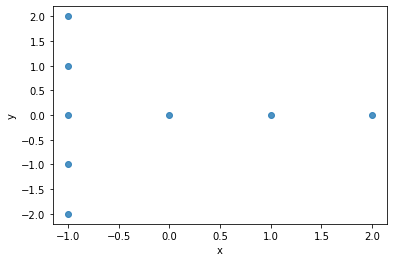

[[0.         0.36787944 0.13533528 0.         0.         0.
  0.         0.        ]
 [0.36787944 0.         0.36787944 0.         0.         0.
  0.         0.        ]
 [0.         0.36787944 0.         0.36787944 0.         0.
  0.         0.        ]
 [0.         0.         0.36787944 0.         0.36787944 0.
  0.         0.        ]
 [0.         0.         0.13533528 0.36787944 0.         0.
  0.         0.        ]
 [0.         0.         0.36787944 0.         0.         0.
  0.36787944 0.        ]
 [0.         0.         0.         0.         0.         0.36787944
  0.         0.36787944]
 [0.         0.         0.         0.         0.         0.13533528
  0.36787944 0.        ]]
[[0.36787944 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.73575888 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.37430889 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.73575888 0.

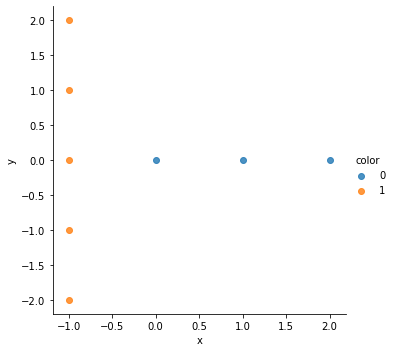

In [223]:
data = np.array([[-1,2],
                [-1,1],
                [-1,0],
                [-1,-1],
                [-1,-2],
                [0,0],
                 [1,0],
                 [2,0]])

data = pd.DataFrame(data)
data = data.rename(columns = {0:"x",1:"y"})

sns.regplot(data['x'],data['y'],fit_reg=False)    
plt.show()

A = np.exp(-kneighbors_graph(data,n_neighbors=2,mode='distance').toarray())
A= np.where(A==1,0, A)
print (A)
#D = np.diag(np.array([2,2,2,2,2,2,2,2]))
D = np.diag(A.sum(axis=0))
print (D)

L = D-A
print (L)
# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
print (vals)



# use Fiedler value to find best cut to separate data
#clusters = vecs[:,1] > 0


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(vecs[:,0:2])
colors = kmeans.labels_
data['color'] = colors
sns.lmplot(x='x',y='y',hue="color", data=data,fit_reg=False)
plt.show()

In [313]:
data = np.array([[4,-2,4],
                [5,-3,5],
                [2,0,2],
                [3,-1,3]])
from sklearn import datasets
#data = datasets.load_iris()['data']
data = data - data.mean(axis=0)

cov = np.cov(data, rowvar=False)

vals, vecs = np.linalg.eig(cov)

# sort them from high to low
vals = vals[np.argsort(-vals)]
vecs = vecs[:,np.argsort(-vals)]

print (vecs[:,0])
print (vals[0])

data.dot(vecs[:,0].T)


[ 0.57735027 -0.57735027  0.57735027]
5.0


array([ 0.8660254 ,  2.59807621, -2.59807621, -0.8660254 ])

In [308]:
data = np.array([[4,-2,4],
                [5,-3,5],
                [2,0,2],
                [3,-1,3]])
#data = datasets.load_iris()['data']
data_standar = StandardScaler(with_std=False).fit_transform(data)

pca = PCA(n_components=3).fit_transform(data_standar)
pca


array([[ 8.66025404e-01,  3.02196169e-16,  4.04878739e-34],
       [ 2.59807621e+00, -5.09786415e-17,  2.17649860e-32],
       [-2.59807621e+00,  5.09786415e-17,  1.98157357e-32],
       [-8.66025404e-01, -3.67568034e-18,  6.25262982e-33]])

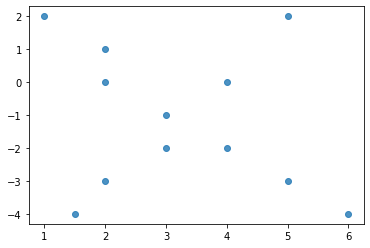

[[-0.9477806   0.31892307]
 [-0.31892307 -0.9477806 ]]


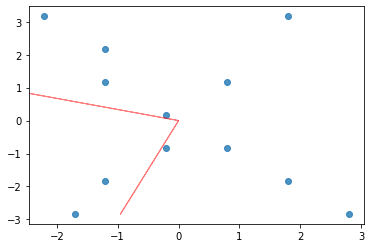

In [364]:
data = np.array([[4,-2],
                [5,-3],
                [2,0],
                [3,-1],
                 [1,2],
                 [6,-4],
                 [2,1],
                 [5,2],[4,0],[3,-2],[2,-3],[1.5,-4]])

sns.regplot(data[:,0], data[:,1], fit_reg=False)
plt.show()

data = data - data.mean(axis=0)

cov = np.cov(data, rowvar=False)

vals, vecs = np.linalg.eig(cov)

# sort them from high to low
vals = vals[np.argsort(-vals)]
vecs = vecs[:,np.argsort(-vals)]

print(vecs)


sns.regplot(data[:,0], data[:,1], fit_reg=False)
plt.arrow(0, 0,vecs[0,0]*3, vecs[0,1]*3,color = 'r',alpha = 0.5)
plt.arrow(0, 0,vecs[1,0]*3, vecs[1,1]*3,color = 'r',alpha = 0.5)
plt.show()

In [358]:
x = np.random.randint(1,10,600)
y = np.random.random(7,10,600)


data = np.column_stack((x, y))
sns.regplot(data[:,0], data[:,1], fit_reg=False)
plt.show()
data = data - data.mean(axis=0)

cov = np.cov(data, rowvar=False)

vals, vecs = np.linalg.eig(cov)

# sort them from high to low
vals = vals[np.argsort(-vals)]
vecs = vecs[:,np.argsort(-vals)]

print(vecs)


sns.regplot(data[:,0], data[:,1], fit_reg=False)
plt.arrow(0, 0,vecs[0,0]*3, vecs[0,1]*3,color = 'r',alpha = 0.5)
plt.arrow(0, 0,vecs[1,0]*3, vecs[1,1]*3,color = 'r',alpha = 0.5)
plt.show()

TypeError: random_sample() takes at most 1 positional argument (3 given)